In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv('/content/ushape.csv')

In [121]:
df = df.rename(columns={'3.159499363321345566e-02'	: 'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'})

In [122]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


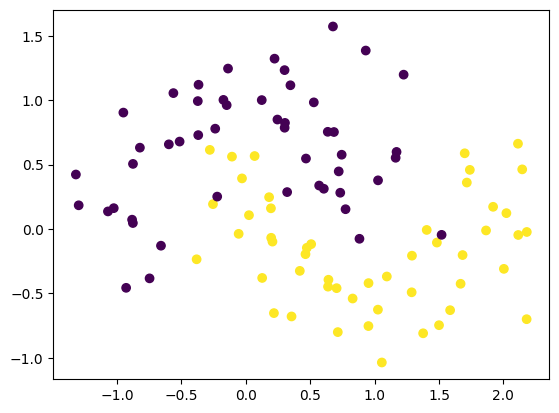

In [123]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [124]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [125]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [126]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.get_weights()

[array([[ 0.43395984,  1.7731613 ,  0.31457698,  0.8619117 ,  0.12978911,
          0.85273165,  2.1556597 , -1.6135008 , -0.2048358 ,  0.44704401],
        [-0.1113114 ,  0.25007445,  1.7528551 , -0.20524593, -1.5441527 ,
         -1.1188631 ,  0.52519304,  0.6918601 , -0.2327368 ,  0.31872046]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-4.45166945e-01, -4.50256139e-01, -3.83323461e-01,
          3.83105189e-01,  1.95110261e-01,  2.92201608e-01,
         -2.71632642e-01, -3.26882042e-02, -1.46201164e-01,
         -6.76581681e-01],
        [ 5.16016304e-01, -9.99446288e-02,  5.21302044e-01,
         -4.87027615e-02, -2.07894489e-01, -1.51968244e-02,
         -4.68282819e-01,  3.85722965e-01,  3.43850881e-01,
          3.02155375e-01],
        [-4.43168171e-02,  9.37699750e-02,  7.19485581e-02,
         -3.58901918e-01, -1.88682094e-01,  5.26017547e-01,
          7.65476465e-01,  9.05572593e-01, -2.94543415e-01,
         -1.0096217

In [128]:
initial_weights = model.get_weights()

In [129]:
#initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
#initial_weights[1] = np.zeros(model.get_weights()[1].shape)
#initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
#initial_weights[3] = np.zeros(model.get_weights()[3].shape)
#initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
#initial_weights[5] = np.zeros(model.get_weights()[5].shape)
#initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
#initial_weights[7] = np.zeros(model.get_weights()[7].shape)
#initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
#initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [130]:
model.set_weights(initial_weights)

In [131]:
model.get_weights()

[array([[ 0.43395984,  1.7731613 ,  0.31457698,  0.8619117 ,  0.12978911,
          0.85273165,  2.1556597 , -1.6135008 , -0.2048358 ,  0.44704401],
        [-0.1113114 ,  0.25007445,  1.7528551 , -0.20524593, -1.5441527 ,
         -1.1188631 ,  0.52519304,  0.6918601 , -0.2327368 ,  0.31872046]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-4.45166945e-01, -4.50256139e-01, -3.83323461e-01,
          3.83105189e-01,  1.95110261e-01,  2.92201608e-01,
         -2.71632642e-01, -3.26882042e-02, -1.46201164e-01,
         -6.76581681e-01],
        [ 5.16016304e-01, -9.99446288e-02,  5.21302044e-01,
         -4.87027615e-02, -2.07894489e-01, -1.51968244e-02,
         -4.68282819e-01,  3.85722965e-01,  3.43850881e-01,
          3.02155375e-01],
        [-4.43168171e-02,  9.37699750e-02,  7.19485581e-02,
         -3.58901918e-01, -1.88682094e-01,  5.26017547e-01,
          7.65476465e-01,  9.05572593e-01, -2.94543415e-01,
         -1.0096217

In [132]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [133]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6148 - loss: 0.6203 - val_accuracy: 0.6000 - val_loss: 0.5898
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6343 - loss: 0.5962 - val_accuracy: 0.6000 - val_loss: 0.5758
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6846 - loss: 0.5722 - val_accuracy: 0.6500 - val_loss: 0.5644
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6807 - loss: 0.5662 - val_accuracy: 0.7000 - val_loss: 0.5536
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6807 - loss: 0.5598 - val_accuracy: 0.7000 - val_loss: 0.5440
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6167 - loss: 0.5814 - val_accuracy: 0.7500 - val_loss: 0.5356
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6909 - loss: 0.5417 - val_accuracy: 0.7500 - val_loss: 0.5255
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7294 - loss: 0.5215 - val_accuracy: 0.7500 - val_loss

In [134]:
model.get_weights()

[array([[ 0.37604192,  1.8630096 ,  0.42622688,  0.81276584,  0.04831001,
          0.84864765,  2.1154137 , -1.7505479 , -0.11552007,  0.36771977],
        [-0.08485331,  0.20269884,  1.838337  , -0.31494516, -1.6516421 ,
         -1.1444246 ,  0.40935624,  0.6073752 , -0.4411671 ,  0.3001965 ]],
       dtype=float32),
 array([-0.02828874, -0.0734148 ,  0.09192669, -0.05101977,  0.00921455,
        -0.07905405,  0.04541165, -0.07722682,  0.15729086,  0.09636159],
       dtype=float32),
 array([[-0.394892  , -0.46841684, -0.3272797 ,  0.459361  ,  0.17222627,
          0.26862627, -0.21638933,  0.08694728, -0.1103598 , -0.7388479 ],
        [ 0.5983174 , -0.11056523,  0.5218853 , -0.0066322 , -0.23107788,
          0.00557211, -0.42156795,  0.52457595,  0.31203377,  0.23816413],
        [ 0.04158367,  0.1280419 , -0.01082816, -0.4139966 , -0.24183042,
          0.6049816 ,  0.83661044,  0.9993485 , -0.37561882, -0.10096218],
        [-0.3085151 ,  0.90318114,  0.4085271 , -0.07625506, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

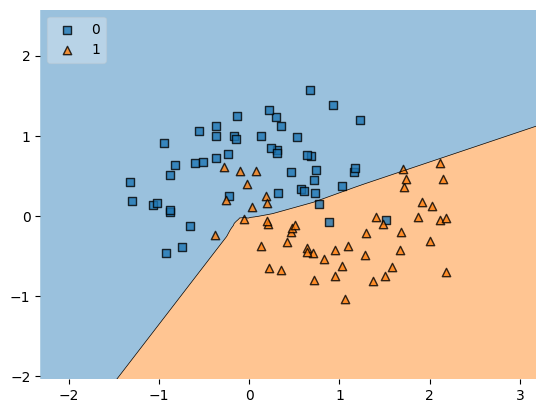

In [135]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [136]:
(np.random.randn(10,10)*0.01).min()

-0.021354972579679724

In [137]:
(np.random.randn(10,10)*0.01).max()

0.02818810127345469